In [1]:
from functions import *

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# high quality figures 
plt.rcParams['figure.dpi'] = 200  # Higher DPI for better quality
plt.rcParams['figure.figsize'] = [3.5, 3.5]  # Smaller physical size but still high quality


## **Modelling the Flache and Macy Model**

### **Initializing the Network**

Let's see what the caveman network looks like. Observe that there are 20 groups of 5 nodes each.

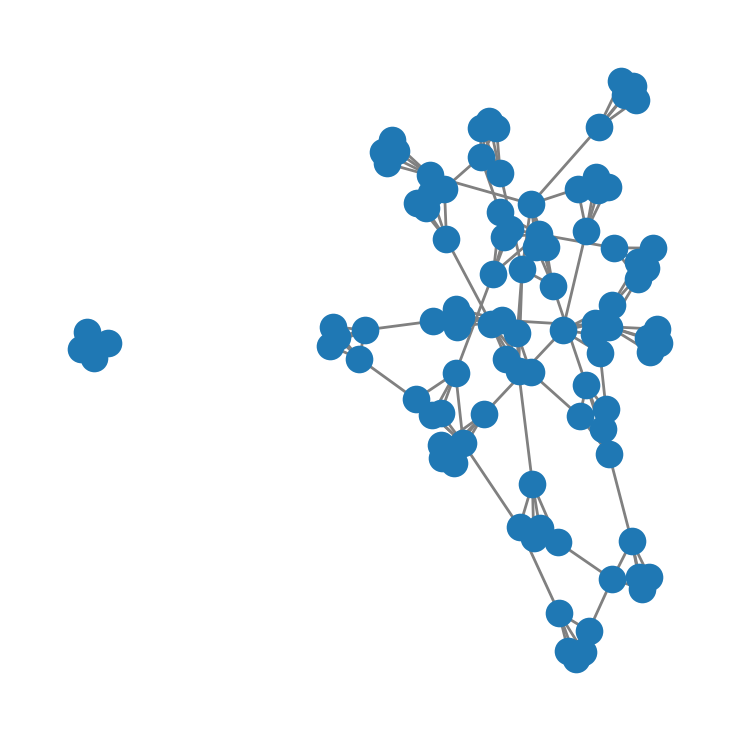

In [2]:
n_caves = 20  # number of groups 
n_members = 5   # number of nodes in each group

# create a cave-man network with 20 nodes in groups of 5
G = nx.connected_caveman_graph(n_caves, n_members)
G = initialize_network(n_caves, n_members, add_random_ties=True, p_random=0.003)

# pos = nx.spring_layout(G)
nx.draw(G, with_labels=False, node_size=80, edge_color='gray')
plt.show()

### **Simulating the Model**

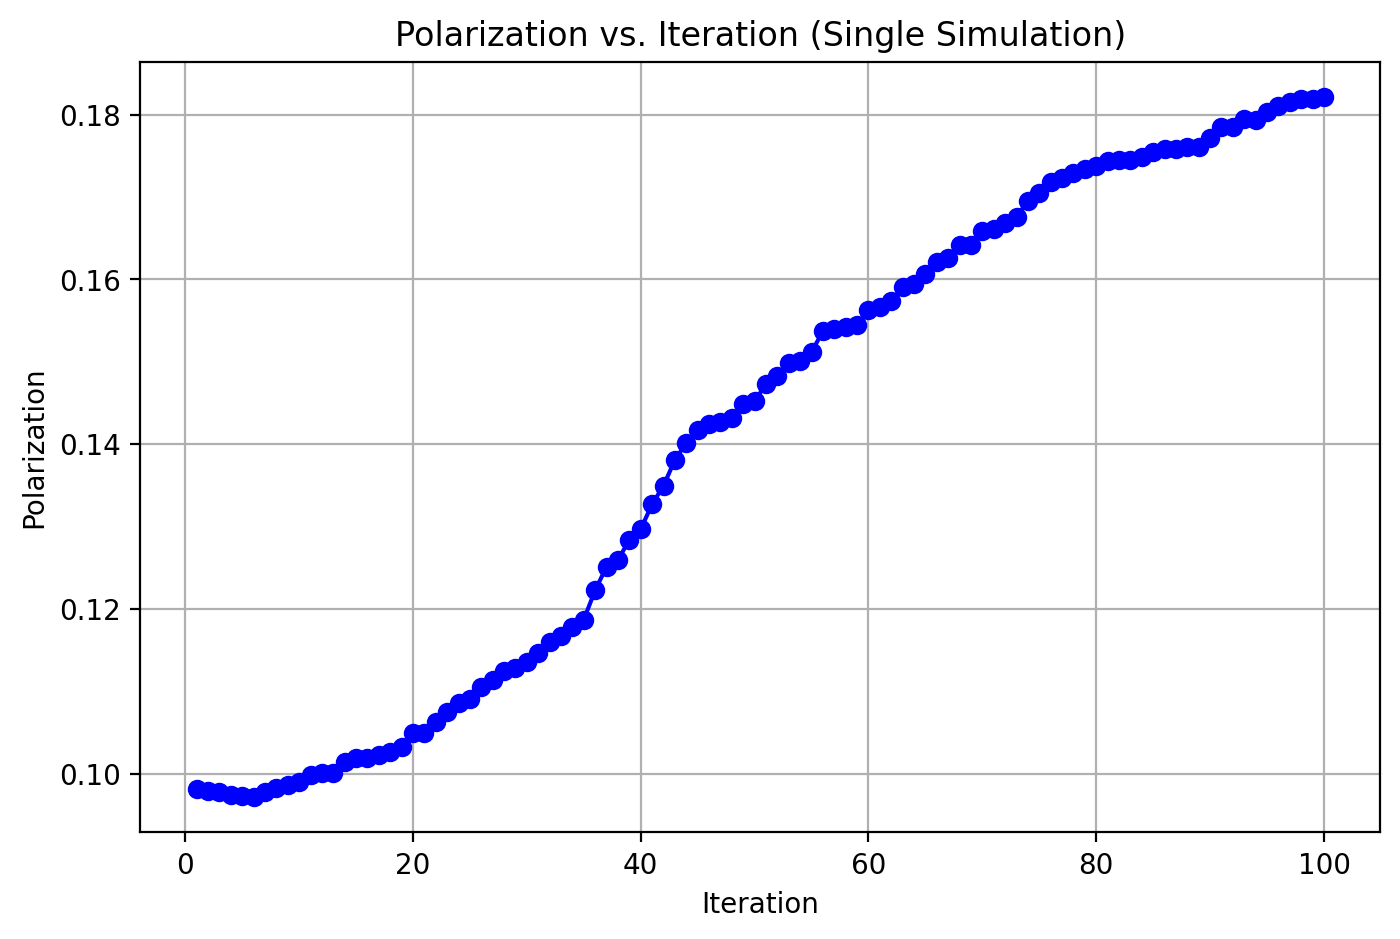

In [3]:
# Set simulation parameters
N = 100
num_caves = 20
cave_size = 5   # (so that N = num_caves * cave_size)
K = 2           # Number of opinion dimensions
num_iterations = 100  # Each iteration = N time steps

# Initialize the network (caveman graph without extra random ties for this example)
G = initialize_network(num_caves, cave_size, add_random_ties=False, p_random=0.003)

# Initialize the opinion matrix S and weight matrix W (using the base FM model assumptions)
S = initialize_opinions(N, K)
W = compute_weights(S)

# Run the simulation for the specified number of iterations
polarization_history, S_final, W_final = run_simulation(G, S, W, num_iterations)

# Plot polarization vs. iteration number
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), polarization_history, marker='o', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Polarization")
plt.title("Polarization vs. Iteration (Single Simulation)")
plt.grid(True)
plt.show()

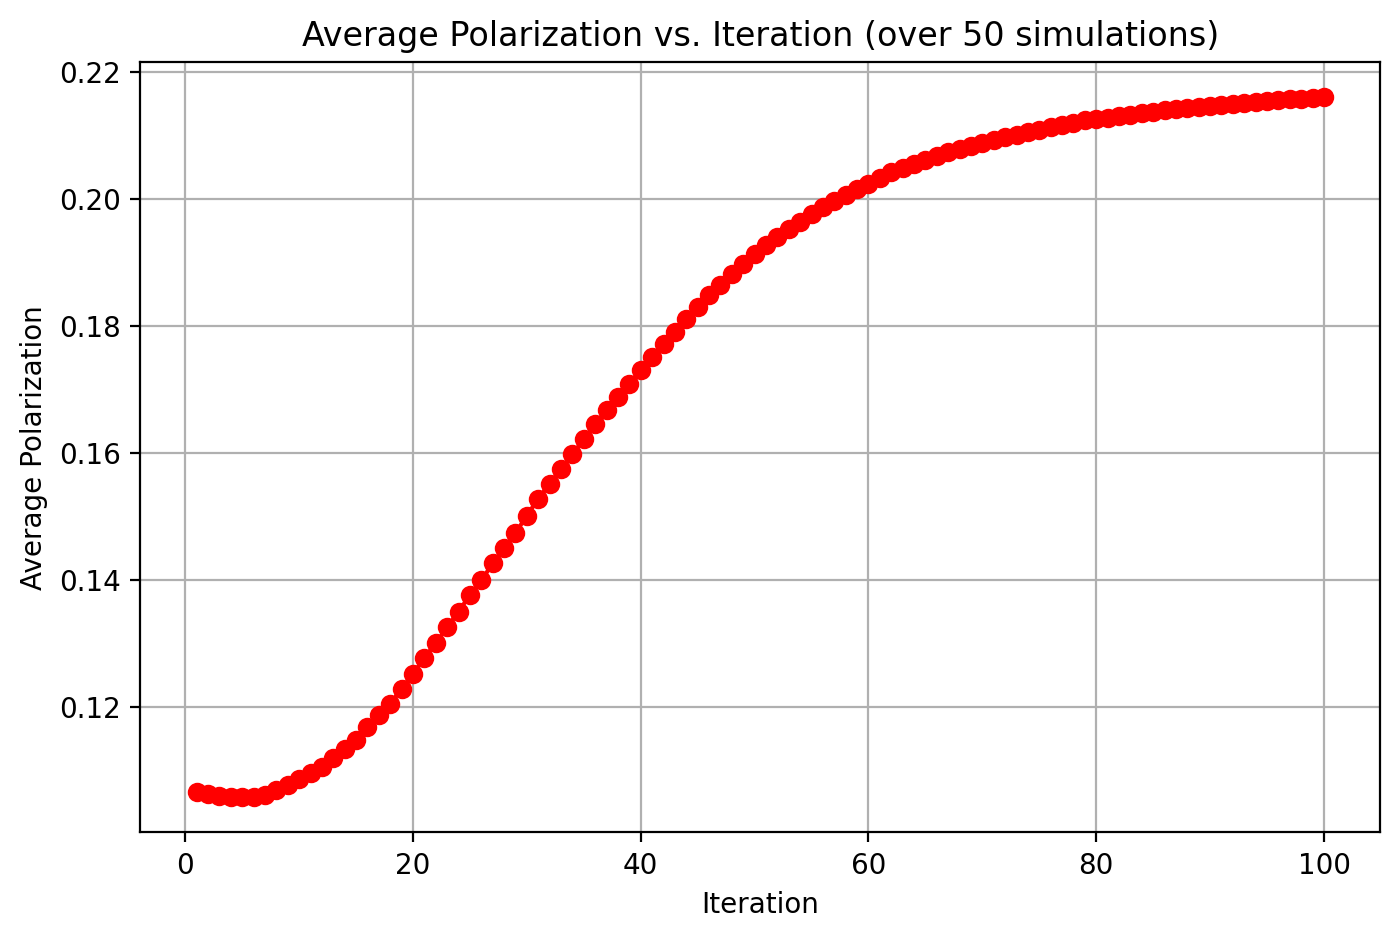

In [4]:
Nsims = 50  # Number of independent simulations
all_polarizations = []  # To store polarization histories for each simulation

# For each simulation, we reinitialize opinions (and weights) but use the same network G.
for sim in range(Nsims):
    S_sim = initialize_opinions(N, K)        # Reinitialize opinions
    W_sim = compute_weights(S_sim)           # Compute initial weights based on S_sim
    
    # Run simulation for this replicate
    pol_history, S_final, W_final = run_simulation(G, S_sim, W_sim, num_iterations)
    all_polarizations.append(pol_history)

# Convert to numpy array: shape (Nsims, num_iterations)
all_polarizations = np.array(all_polarizations)

# Compute the average polarization at each iteration across simulations
avg_polarization = np.mean(all_polarizations, axis=0)

# Plot average polarization vs. iteration number
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), avg_polarization, marker='o', color='red')
plt.xlabel("Iteration")
plt.ylabel("Average Polarization")
plt.title("Average Polarization vs. Iteration (over {} simulations)".format(Nsims))
plt.grid(True)
plt.show()


### **Model without Negative Valence**

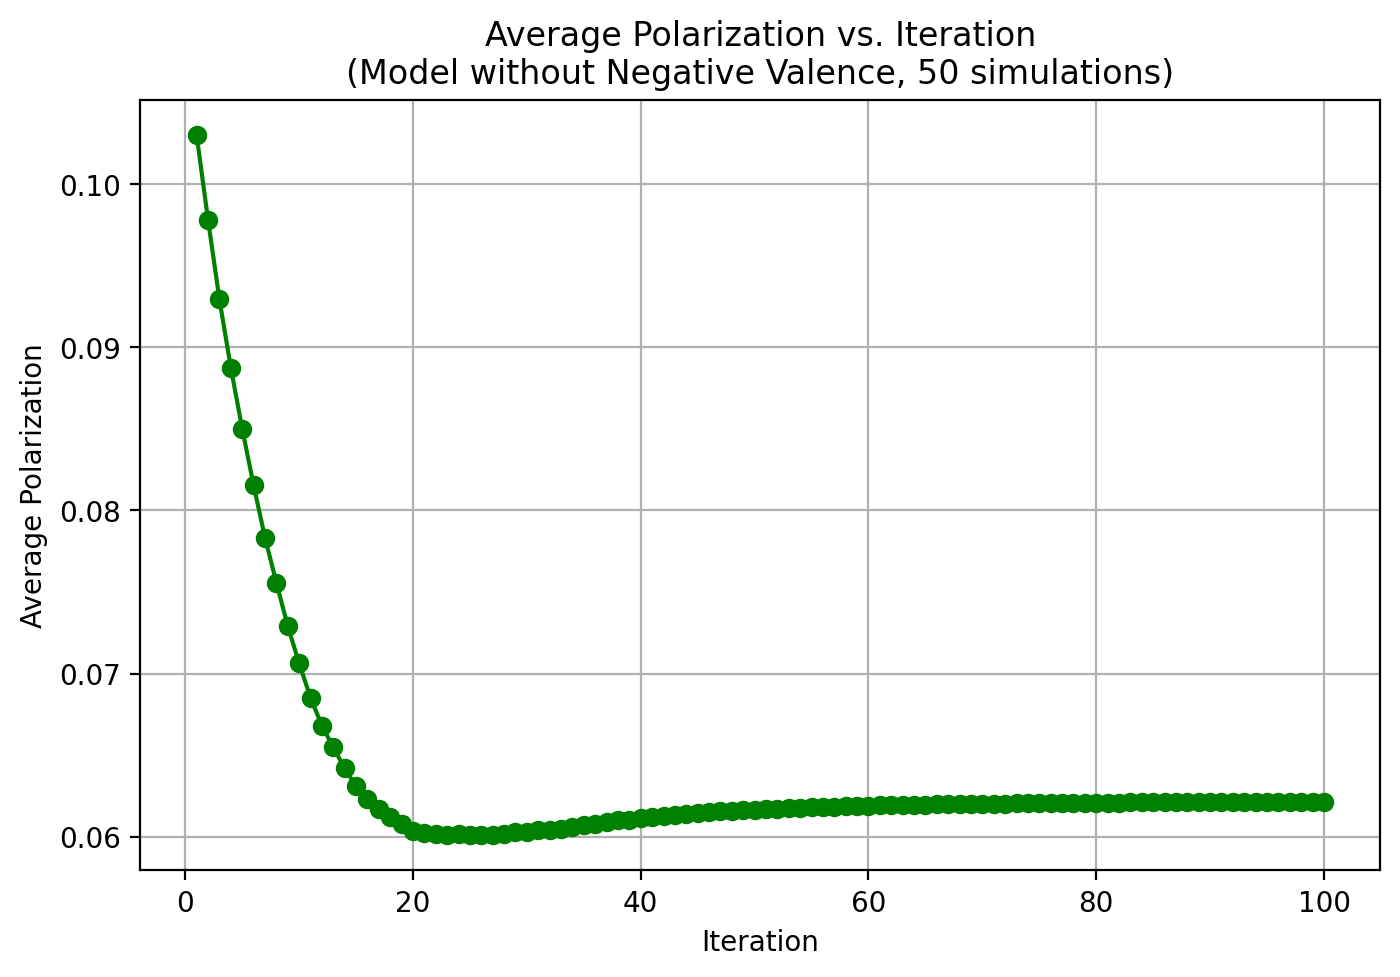

In [2]:
num_caves = 20
cave_size = 5        # Thus, N = 20 * 5 = 100 agents.
N = num_caves * cave_size
K = 2                # Two opinion dimensions.
num_iterations = 100 # Each iteration = 100 time steps.
Nsims = 50           # Run 50 independent simulations.
allow_negative = False  # Model without negative valence of interaction.

# Initialize the network (here, we do not add extra random ties)
G = initialize_network(num_caves, cave_size, add_random_ties=False, p_random=0.003)

# Container for polarization histories from each simulation
all_polarizations = []

for sim in range(Nsims):
    # Reinitialize opinions and weights for each simulation
    S_sim = initialize_opinions(N, K)
    W_sim = compute_weights(S_sim, allow_negative=allow_negative)
    
    # Run the simulation for num_iterations iterations
    pol_history, S_final, W_final = run_simulation(G, S_sim, W_sim, num_iterations, allow_negative=allow_negative)
    all_polarizations.append(pol_history)

all_polarizations = np.array(all_polarizations)  # Shape: (Nsims, num_iterations)
avg_polarization = np.mean(all_polarizations, axis=0)

# Plot average polarization vs. iteration
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), avg_polarization, marker='o', color='green')
plt.xlabel("Iteration")
plt.ylabel("Average Polarization")
plt.title("Average Polarization vs. Iteration\n(Model without Negative Valence, {} simulations)".format(Nsims))
plt.grid(True)
plt.show()